In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.metrics import MAE,MAPE,mean_squared_error,mean_absolute_percentage_error
from keras.losses import MAE,MAPE,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import time

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
x = np.loadtxt("deshar.txt")
df = pd.DataFrame(x,columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","Effort"])

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:9])
        train_y.append(i[9])
    for i in test_d:
        test_x.append(i[:9])
        test_y.append(i[9])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [6]:
foldsIndex = k10Fold(24,scaled_data)

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14], [15, 16, 17], [18, 19, 20], [21, 22, 23], [24, 25, 26], [27, 28, 29], [30, 31, 32], [33, 34, 35], [36, 37, 38], [39, 40, 41], [42, 43, 44], [45, 46, 47], [48, 49, 50], [51, 52, 53], [54, 55, 56], [57, 58, 59], [60, 61, 62], [63, 64, 65], [66, 67, 68], [69, 70, 71], [73, 74, 75, 76]]


In [7]:
model = Sequential()
model.add(Dense((128), activation="tanh", input_shape=(9,)))
model.add(Dense((64), activation="tanh"))
model.add(Dense((32), activation="tanh"))
model.add(Dense((1), activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae","mape"])

training using 24 folds: each model has 200 epochs
 
Fold  # 1


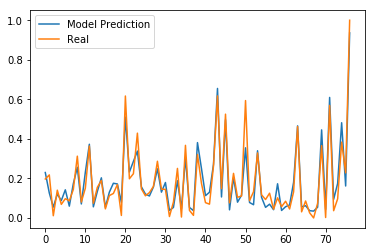

predicted =  [0.22960646]        real =  0.19688809096349494       
predicted =  [0.1261653]        real =  0.2175344105326152       
predicted =  [0.05470502]        real =  0.011071214841412332       
predicted =  [0.12108447]        real =  0.1403351286654698       
predicted =  [0.08775402]        real =  0.06852184320766008       
predicted =  [0.14221059]        real =  0.09724715739078396       
predicted =  [0.05954542]        real =  0.08647516457211252       
predicted =  [0.1733433]        real =  0.14392579293836028       
predicted =  [0.25593734]        real =  0.3123877917414722       
predicted =  [0.07064104]        real =  0.08019150209455417       
predicted =  [0.2311583]        real =  0.1505086774386595       
predicted =  [0.3726603]        real =  0.3635547576301616       
predicted =  [0.05609873]        real =  0.0742070616397367       
predicted =  [0.13419195]        real =  0.1549970077797726       
predicted =  [0.20281991]        real =  0.189407540394973

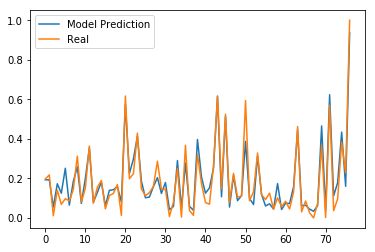

predicted =  [0.19280466]        real =  0.19688809096349494       
predicted =  [0.19262418]        real =  0.2175344105326152       
predicted =  [0.05547762]        real =  0.011071214841412332       
predicted =  [0.17291176]        real =  0.1403351286654698       
predicted =  [0.12494062]        real =  0.06852184320766008       
predicted =  [0.25124365]        real =  0.09724715739078396       
predicted =  [0.06456553]        real =  0.08647516457211252       
predicted =  [0.1852208]        real =  0.14392579293836028       
predicted =  [0.258665]        real =  0.3123877917414722       
predicted =  [0.07340614]        real =  0.08019150209455417       
predicted =  [0.19932628]        real =  0.1505086774386595       
predicted =  [0.353089]        real =  0.3635547576301616       
predicted =  [0.07887595]        real =  0.0742070616397367       
predicted =  [0.12867491]        real =  0.1549970077797726       
predicted =  [0.18220669]        real =  0.1894075403949731

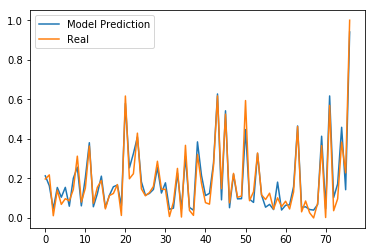

predicted =  [0.21283919]        real =  0.19688809096349494       
predicted =  [0.16282609]        real =  0.2175344105326152       
predicted =  [0.04620213]        real =  0.011071214841412332       
predicted =  [0.1539513]        real =  0.1403351286654698       
predicted =  [0.10464168]        real =  0.06852184320766008       
predicted =  [0.15460001]        real =  0.09724715739078396       
predicted =  [0.05924135]        real =  0.08647516457211252       
predicted =  [0.20035972]        real =  0.14392579293836028       
predicted =  [0.25644705]        real =  0.3123877917414722       
predicted =  [0.06094281]        real =  0.08019150209455417       
predicted =  [0.20373853]        real =  0.1505086774386595       
predicted =  [0.38046765]        real =  0.3635547576301616       
predicted =  [0.05645445]        real =  0.0742070616397367       
predicted =  [0.12239679]        real =  0.1549970077797726       
predicted =  [0.21126927]        real =  0.189407540394

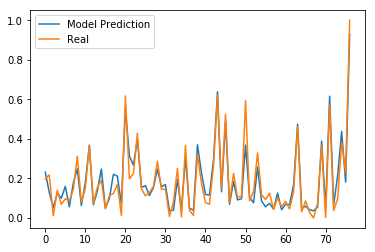

predicted =  [0.23123609]        real =  0.19688809096349494       
predicted =  [0.12799631]        real =  0.2175344105326152       
predicted =  [0.05192697]        real =  0.011071214841412332       
predicted =  [0.12527825]        real =  0.1403351286654698       
predicted =  [0.09959441]        real =  0.06852184320766008       
predicted =  [0.15972017]        real =  0.09724715739078396       
predicted =  [0.05578949]        real =  0.08647516457211252       
predicted =  [0.17592487]        real =  0.14392579293836028       
predicted =  [0.24936451]        real =  0.3123877917414722       
predicted =  [0.06324941]        real =  0.08019150209455417       
predicted =  [0.17870246]        real =  0.1505086774386595       
predicted =  [0.36810735]        real =  0.3635547576301616       
predicted =  [0.06674495]        real =  0.0742070616397367       
predicted =  [0.13642494]        real =  0.1549970077797726       
predicted =  [0.24708867]        real =  0.18940754039

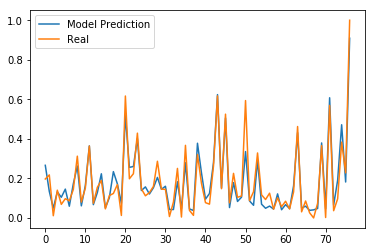

predicted =  [0.2660886]        real =  0.19688809096349494       
predicted =  [0.13418512]        real =  0.2175344105326152       
predicted =  [0.04951973]        real =  0.011071214841412332       
predicted =  [0.13157944]        real =  0.1403351286654698       
predicted =  [0.1044028]        real =  0.06852184320766008       
predicted =  [0.14570116]        real =  0.09724715739078396       
predicted =  [0.05918001]        real =  0.08647516457211252       
predicted =  [0.17275217]        real =  0.14392579293836028       
predicted =  [0.26256078]        real =  0.3123877917414722       
predicted =  [0.06101827]        real =  0.08019150209455417       
predicted =  [0.16384864]        real =  0.1505086774386595       
predicted =  [0.36449686]        real =  0.3635547576301616       
predicted =  [0.06711818]        real =  0.0742070616397367       
predicted =  [0.12853603]        real =  0.1549970077797726       
predicted =  [0.2232731]        real =  0.18940754039497

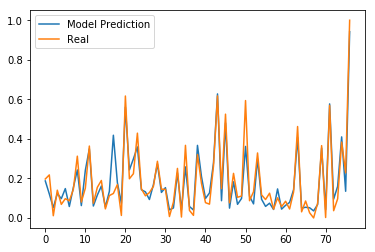

predicted =  [0.18709481]        real =  0.19688809096349494       
predicted =  [0.12162584]        real =  0.2175344105326152       
predicted =  [0.05201566]        real =  0.011071214841412332       
predicted =  [0.12347734]        real =  0.1403351286654698       
predicted =  [0.09729809]        real =  0.06852184320766008       
predicted =  [0.14833862]        real =  0.09724715739078396       
predicted =  [0.05769326]        real =  0.08647516457211252       
predicted =  [0.15280044]        real =  0.14392579293836028       
predicted =  [0.24269342]        real =  0.3123877917414722       
predicted =  [0.062396]        real =  0.08019150209455417       
predicted =  [0.24133337]        real =  0.1505086774386595       
predicted =  [0.34955248]        real =  0.3635547576301616       
predicted =  [0.0602053]        real =  0.0742070616397367       
predicted =  [0.11563656]        real =  0.1549970077797726       
predicted =  [0.16135229]        real =  0.18940754039497

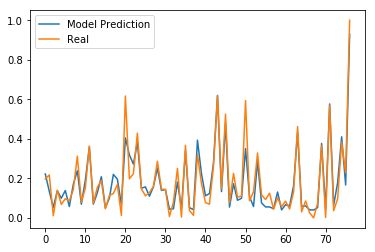

predicted =  [0.22238135]        real =  0.19688809096349494       
predicted =  [0.13445954]        real =  0.2175344105326152       
predicted =  [0.05289352]        real =  0.011071214841412332       
predicted =  [0.13735011]        real =  0.1403351286654698       
predicted =  [0.09953644]        real =  0.06852184320766008       
predicted =  [0.13867034]        real =  0.09724715739078396       
predicted =  [0.05768284]        real =  0.08647516457211252       
predicted =  [0.17036426]        real =  0.14392579293836028       
predicted =  [0.23863605]        real =  0.3123877917414722       
predicted =  [0.06936186]        real =  0.08019150209455417       
predicted =  [0.19088477]        real =  0.1505086774386595       
predicted =  [0.35939857]        real =  0.3635547576301616       
predicted =  [0.0696747]        real =  0.0742070616397367       
predicted =  [0.12767613]        real =  0.1549970077797726       
predicted =  [0.20843704]        real =  0.189407540394

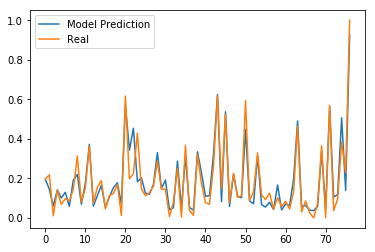

predicted =  [0.19571924]        real =  0.19688809096349494       
predicted =  [0.14551719]        real =  0.2175344105326152       
predicted =  [0.0604452]        real =  0.011071214841412332       
predicted =  [0.14112556]        real =  0.1403351286654698       
predicted =  [0.10086928]        real =  0.06852184320766008       
predicted =  [0.12976503]        real =  0.09724715739078396       
predicted =  [0.05821658]        real =  0.08647516457211252       
predicted =  [0.19126655]        real =  0.14392579293836028       
predicted =  [0.22027339]        real =  0.3123877917414722       
predicted =  [0.06990337]        real =  0.08019150209455417       
predicted =  [0.17547423]        real =  0.1505086774386595       
predicted =  [0.37203565]        real =  0.3635547576301616       
predicted =  [0.0591603]        real =  0.0742070616397367       
predicted =  [0.11232463]        real =  0.1549970077797726       
predicted =  [0.16523072]        real =  0.1894075403949

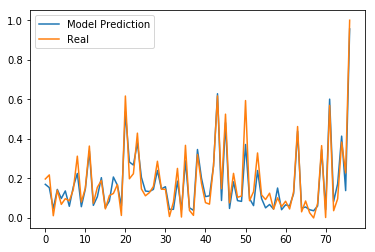

predicted =  [0.16995049]        real =  0.19688809096349494       
predicted =  [0.1533181]        real =  0.2175344105326152       
predicted =  [0.04771307]        real =  0.011071214841412332       
predicted =  [0.14415598]        real =  0.1403351286654698       
predicted =  [0.09815646]        real =  0.06852184320766008       
predicted =  [0.13656396]        real =  0.09724715739078396       
predicted =  [0.05883483]        real =  0.08647516457211252       
predicted =  [0.1574964]        real =  0.14392579293836028       
predicted =  [0.2248686]        real =  0.3123877917414722       
predicted =  [0.05672863]        real =  0.08019150209455417       
predicted =  [0.14626782]        real =  0.1505086774386595       
predicted =  [0.33780438]        real =  0.3635547576301616       
predicted =  [0.06355022]        real =  0.0742070616397367       
predicted =  [0.1073368]        real =  0.1549970077797726       
predicted =  [0.203644]        real =  0.1894075403949731 

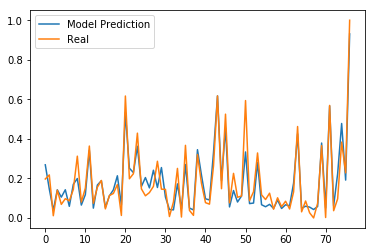

predicted =  [0.2686069]        real =  0.19688809096349494       
predicted =  [0.14629105]        real =  0.2175344105326152       
predicted =  [0.0395955]        real =  0.011071214841412332       
predicted =  [0.1422287]        real =  0.1403351286654698       
predicted =  [0.1050648]        real =  0.06852184320766008       
predicted =  [0.1424305]        real =  0.09724715739078396       
predicted =  [0.05869456]        real =  0.08647516457211252       
predicted =  [0.17016354]        real =  0.14392579293836028       
predicted =  [0.19919057]        real =  0.3123877917414722       
predicted =  [0.06494933]        real =  0.08019150209455417       
predicted =  [0.1176421]        real =  0.1505086774386595       
predicted =  [0.34120557]        real =  0.3635547576301616       
predicted =  [0.04949706]        real =  0.0742070616397367       
predicted =  [0.1661124]        real =  0.1549970077797726       
predicted =  [0.18830018]        real =  0.1894075403949731  

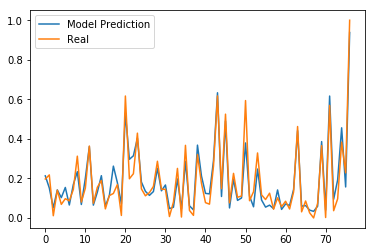

predicted =  [0.21281408]        real =  0.19688809096349494       
predicted =  [0.1516254]        real =  0.2175344105326152       
predicted =  [0.05133933]        real =  0.011071214841412332       
predicted =  [0.14176169]        real =  0.1403351286654698       
predicted =  [0.10263902]        real =  0.06852184320766008       
predicted =  [0.15406266]        real =  0.09724715739078396       
predicted =  [0.06534743]        real =  0.08647516457211252       
predicted =  [0.16886592]        real =  0.14392579293836028       
predicted =  [0.23379318]        real =  0.3123877917414722       
predicted =  [0.06792136]        real =  0.08019150209455417       
predicted =  [0.20037682]        real =  0.1505086774386595       
predicted =  [0.36114338]        real =  0.3635547576301616       
predicted =  [0.06469595]        real =  0.0742070616397367       
predicted =  [0.13038883]        real =  0.1549970077797726       
predicted =  [0.2136334]        real =  0.1894075403949

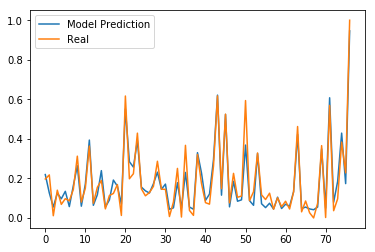

predicted =  [0.21925585]        real =  0.19688809096349494       
predicted =  [0.12646727]        real =  0.2175344105326152       
predicted =  [0.05518786]        real =  0.011071214841412332       
predicted =  [0.12523805]        real =  0.1403351286654698       
predicted =  [0.09659819]        real =  0.06852184320766008       
predicted =  [0.13455829]        real =  0.09724715739078396       
predicted =  [0.05725019]        real =  0.08647516457211252       
predicted =  [0.16277495]        real =  0.14392579293836028       
predicted =  [0.26401356]        real =  0.3123877917414722       
predicted =  [0.05926548]        real =  0.08019150209455417       
predicted =  [0.17129765]        real =  0.1505086774386595       
predicted =  [0.3937799]        real =  0.3635547576301616       
predicted =  [0.06381615]        real =  0.0742070616397367       
predicted =  [0.11736151]        real =  0.1549970077797726       
predicted =  [0.23921901]        real =  0.189407540394

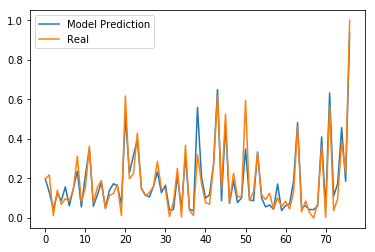

predicted =  [0.19684891]        real =  0.19688809096349494       
predicted =  [0.13006893]        real =  0.2175344105326152       
predicted =  [0.04430149]        real =  0.011071214841412332       
predicted =  [0.12316982]        real =  0.1403351286654698       
predicted =  [0.08790975]        real =  0.06852184320766008       
predicted =  [0.15697172]        real =  0.09724715739078396       
predicted =  [0.06163558]        real =  0.08647516457211252       
predicted =  [0.14782238]        real =  0.14392579293836028       
predicted =  [0.23690209]        real =  0.3123877917414722       
predicted =  [0.05529748]        real =  0.08019150209455417       
predicted =  [0.21273747]        real =  0.1505086774386595       
predicted =  [0.35100716]        real =  0.3635547576301616       
predicted =  [0.05884129]        real =  0.0742070616397367       
predicted =  [0.11631853]        real =  0.1549970077797726       
predicted =  [0.17931041]        real =  0.18940754039

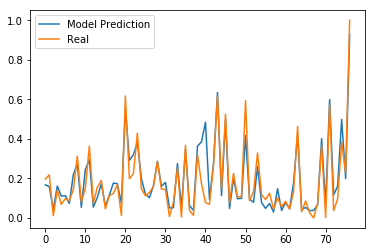

predicted =  [0.16708575]        real =  0.19688809096349494       
predicted =  [0.15815665]        real =  0.2175344105326152       
predicted =  [0.04248817]        real =  0.011071214841412332       
predicted =  [0.16158593]        real =  0.1403351286654698       
predicted =  [0.11061426]        real =  0.06852184320766008       
predicted =  [0.11264694]        real =  0.09724715739078396       
predicted =  [0.07338242]        real =  0.08647516457211252       
predicted =  [0.21874107]        real =  0.14392579293836028       
predicted =  [0.2732254]        real =  0.3123877917414722       
predicted =  [0.05358998]        real =  0.08019150209455417       
predicted =  [0.24477376]        real =  0.1505086774386595       
predicted =  [0.29424375]        real =  0.3635547576301616       
predicted =  [0.05443441]        real =  0.0742070616397367       
predicted =  [0.10409535]        real =  0.1549970077797726       
predicted =  [0.17360106]        real =  0.189407540394

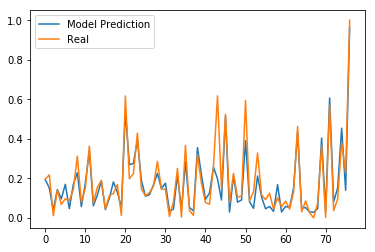

predicted =  [0.19481508]        real =  0.19688809096349494       
predicted =  [0.15088409]        real =  0.2175344105326152       
predicted =  [0.04034919]        real =  0.011071214841412332       
predicted =  [0.14351563]        real =  0.1403351286654698       
predicted =  [0.09624304]        real =  0.06852184320766008       
predicted =  [0.17012708]        real =  0.09724715739078396       
predicted =  [0.0466726]        real =  0.08647516457211252       
predicted =  [0.16970177]        real =  0.14392579293836028       
predicted =  [0.22800896]        real =  0.3123877917414722       
predicted =  [0.05678853]        real =  0.08019150209455417       
predicted =  [0.17504404]        real =  0.1505086774386595       
predicted =  [0.3400735]        real =  0.3635547576301616       
predicted =  [0.06089759]        real =  0.0742070616397367       
predicted =  [0.11526231]        real =  0.1549970077797726       
predicted =  [0.18853804]        real =  0.1894075403949

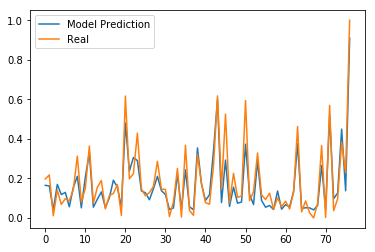

predicted =  [0.16475616]        real =  0.19688809096349494       
predicted =  [0.161853]        real =  0.2175344105326152       
predicted =  [0.04110688]        real =  0.011071214841412332       
predicted =  [0.16982873]        real =  0.1403351286654698       
predicted =  [0.11799704]        real =  0.06852184320766008       
predicted =  [0.12922008]        real =  0.09724715739078396       
predicted =  [0.05622483]        real =  0.08647516457211252       
predicted =  [0.15417105]        real =  0.14392579293836028       
predicted =  [0.21053673]        real =  0.3123877917414722       
predicted =  [0.0510156]        real =  0.08019150209455417       
predicted =  [0.20664555]        real =  0.1505086774386595       
predicted =  [0.32974488]        real =  0.3635547576301616       
predicted =  [0.05435739]        real =  0.0742070616397367       
predicted =  [0.09452658]        real =  0.1549970077797726       
predicted =  [0.13157573]        real =  0.18940754039497

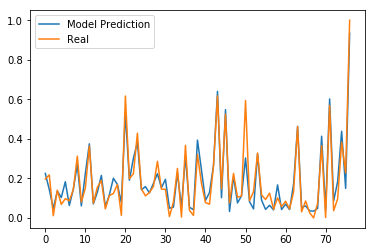

predicted =  [0.22479591]        real =  0.19688809096349494       
predicted =  [0.1434608]        real =  0.2175344105326152       
predicted =  [0.04765709]        real =  0.011071214841412332       
predicted =  [0.13564584]        real =  0.1403351286654698       
predicted =  [0.10366796]        real =  0.06852184320766008       
predicted =  [0.18308227]        real =  0.09724715739078396       
predicted =  [0.06282255]        real =  0.08647516457211252       
predicted =  [0.14575104]        real =  0.14392579293836028       
predicted =  [0.2700481]        real =  0.3123877917414722       
predicted =  [0.06057649]        real =  0.08019150209455417       
predicted =  [0.22503974]        real =  0.1505086774386595       
predicted =  [0.37463766]        real =  0.3635547576301616       
predicted =  [0.07068454]        real =  0.0742070616397367       
predicted =  [0.13028337]        real =  0.1549970077797726       
predicted =  [0.2151182]        real =  0.18940754039497

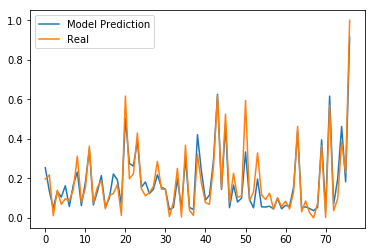

predicted =  [0.25390205]        real =  0.19688809096349494       
predicted =  [0.13639362]        real =  0.2175344105326152       
predicted =  [0.04955637]        real =  0.011071214841412332       
predicted =  [0.13291289]        real =  0.1403351286654698       
predicted =  [0.10551051]        real =  0.06852184320766008       
predicted =  [0.1626966]        real =  0.09724715739078396       
predicted =  [0.05760771]        real =  0.08647516457211252       
predicted =  [0.16708638]        real =  0.14392579293836028       
predicted =  [0.23187816]        real =  0.3123877917414722       
predicted =  [0.06248226]        real =  0.08019150209455417       
predicted =  [0.17877506]        real =  0.1505086774386595       
predicted =  [0.3453391]        real =  0.3635547576301616       
predicted =  [0.06546149]        real =  0.0742070616397367       
predicted =  [0.13319753]        real =  0.1549970077797726       
predicted =  [0.21401773]        real =  0.1894075403949

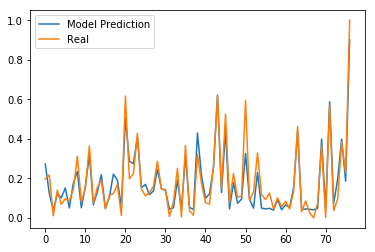

predicted =  [0.27206963]        real =  0.19688809096349494       
predicted =  [0.12353776]        real =  0.2175344105326152       
predicted =  [0.03994577]        real =  0.011071214841412332       
predicted =  [0.12106473]        real =  0.1403351286654698       
predicted =  [0.10206482]        real =  0.06852184320766008       
predicted =  [0.15155753]        real =  0.09724715739078396       
predicted =  [0.05037392]        real =  0.08647516457211252       
predicted =  [0.17625906]        real =  0.14392579293836028       
predicted =  [0.23458596]        real =  0.3123877917414722       
predicted =  [0.05118524]        real =  0.08019150209455417       
predicted =  [0.15901914]        real =  0.1505086774386595       
predicted =  [0.31893638]        real =  0.3635547576301616       
predicted =  [0.06650905]        real =  0.0742070616397367       
predicted =  [0.13248068]        real =  0.1549970077797726       
predicted =  [0.21822502]        real =  0.18940754039

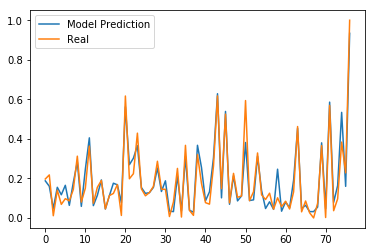

predicted =  [0.18744504]        real =  0.19688809096349494       
predicted =  [0.16018398]        real =  0.2175344105326152       
predicted =  [0.04826865]        real =  0.011071214841412332       
predicted =  [0.15487416]        real =  0.1403351286654698       
predicted =  [0.11710877]        real =  0.06852184320766008       
predicted =  [0.16502395]        real =  0.09724715739078396       
predicted =  [0.06358312]        real =  0.08647516457211252       
predicted =  [0.17976311]        real =  0.14392579293836028       
predicted =  [0.28296912]        real =  0.3123877917414722       
predicted =  [0.05841652]        real =  0.08019150209455417       
predicted =  [0.24608284]        real =  0.1505086774386595       
predicted =  [0.40508223]        real =  0.3635547576301616       
predicted =  [0.06214439]        real =  0.0742070616397367       
predicted =  [0.11430047]        real =  0.1549970077797726       
predicted =  [0.19205438]        real =  0.18940754039

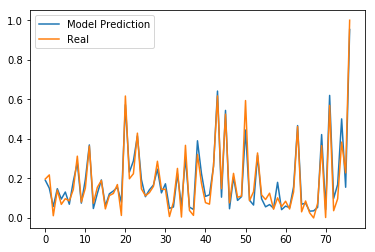

predicted =  [0.19065112]        real =  0.19688809096349494       
predicted =  [0.15070511]        real =  0.2175344105326152       
predicted =  [0.05792743]        real =  0.011071214841412332       
predicted =  [0.14787802]        real =  0.1403351286654698       
predicted =  [0.09534412]        real =  0.06852184320766008       
predicted =  [0.13091049]        real =  0.09724715739078396       
predicted =  [0.06915703]        real =  0.08647516457211252       
predicted =  [0.18588425]        real =  0.14392579293836028       
predicted =  [0.2789583]        real =  0.3123877917414722       
predicted =  [0.07472741]        real =  0.08019150209455417       
predicted =  [0.19445603]        real =  0.1505086774386595       
predicted =  [0.36917174]        real =  0.3635547576301616       
predicted =  [0.04761213]        real =  0.0742070616397367       
predicted =  [0.12400126]        real =  0.1549970077797726       
predicted =  [0.19209374]        real =  0.189407540394

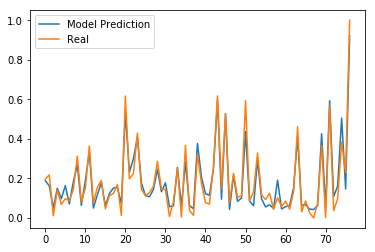

predicted =  [0.18852574]        real =  0.19688809096349494       
predicted =  [0.16174017]        real =  0.2175344105326152       
predicted =  [0.049928]        real =  0.011071214841412332       
predicted =  [0.1500824]        real =  0.1403351286654698       
predicted =  [0.09710703]        real =  0.06852184320766008       
predicted =  [0.16332152]        real =  0.09724715739078396       
predicted =  [0.07010898]        real =  0.08647516457211252       
predicted =  [0.18375695]        real =  0.14392579293836028       
predicted =  [0.26716617]        real =  0.3123877917414722       
predicted =  [0.06323842]        real =  0.08019150209455417       
predicted =  [0.18840301]        real =  0.1505086774386595       
predicted =  [0.33333302]        real =  0.3635547576301616       
predicted =  [0.04994877]        real =  0.0742070616397367       
predicted =  [0.11617266]        real =  0.1549970077797726       
predicted =  [0.17963433]        real =  0.18940754039497

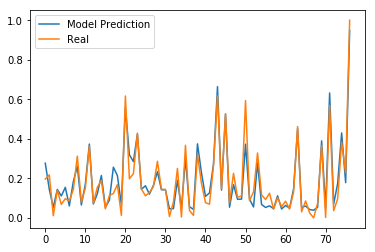

predicted =  [0.27695397]        real =  0.19688809096349494       
predicted =  [0.1444943]        real =  0.2175344105326152       
predicted =  [0.0531275]        real =  0.011071214841412332       
predicted =  [0.14422914]        real =  0.1403351286654698       
predicted =  [0.11087581]        real =  0.06852184320766008       
predicted =  [0.15470037]        real =  0.09724715739078396       
predicted =  [0.06055829]        real =  0.08647516457211252       
predicted =  [0.18385269]        real =  0.14392579293836028       
predicted =  [0.26154298]        real =  0.3123877917414722       
predicted =  [0.06544997]        real =  0.08019150209455417       
predicted =  [0.17036468]        real =  0.1505086774386595       
predicted =  [0.3736549]        real =  0.3635547576301616       
predicted =  [0.07033922]        real =  0.0742070616397367       
predicted =  [0.12302551]        real =  0.1549970077797726       
predicted =  [0.21453959]        real =  0.18940754039497

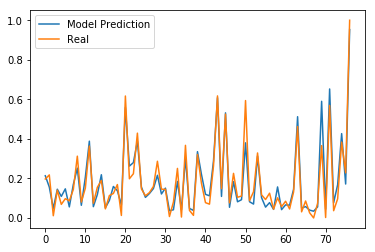

predicted =  [0.21328202]        real =  0.19688809096349494       
predicted =  [0.15613711]        real =  0.2175344105326152       
predicted =  [0.0483176]        real =  0.011071214841412332       
predicted =  [0.14513358]        real =  0.1403351286654698       
predicted =  [0.10874117]        real =  0.06852184320766008       
predicted =  [0.14706333]        real =  0.09724715739078396       
predicted =  [0.05575052]        real =  0.08647516457211252       
predicted =  [0.16922848]        real =  0.14392579293836028       
predicted =  [0.2516802]        real =  0.3123877917414722       
predicted =  [0.06385813]        real =  0.08019150209455417       
predicted =  [0.20608489]        real =  0.1505086774386595       
predicted =  [0.38824436]        real =  0.3635547576301616       
predicted =  [0.05692121]        real =  0.0742070616397367       
predicted =  [0.11835184]        real =  0.1549970077797726       
predicted =  [0.21837457]        real =  0.1894075403949

In [9]:
avg_ame = 0
print("training using 24 folds: each model has 200 epochs")
start  = time.time()
for i in range(1):
    for i in range(24):
        print(" ")
        print("Fold ","#",i+1)
        
        model = Sequential()
        model.add(Dense((128), activation="tanh", input_shape=(9,)))
        model.add(Dense((64), activation="tanh"))
        model.add(Dense((32), activation="tanh"))
        model.add(Dense((1), activation="sigmoid"))
        model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mae","mape"])
        
        train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
        train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
        model.fit(train_x,train_y, epochs=200, batch_size=10, verbose=0, validation_data=(test_x,test_y))
        
        all_data_x =[]
        all_data_y = []
        for i in scaled_data:
            all_data_x.append(i[:9])
            all_data_y.append(i[9])
        all_data_x = np.array(all_data_x)
        all_data_y = np.array(all_data_y)
        
        prediction = model.predict(all_data_x)
        
        plt.plot(prediction, label="Model Prediction")
        plt.plot(all_data_y, label="Real")
        plt.legend()
        plt.show()
        
        for i in range(len(prediction)):
            print("predicted = ", prediction[i],"      ","real = ", all_data_y[i],"      ")
        print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
        prediction = model.predict(test_x)
        print("Test-MAE: ",mean_absolute_error(test_y,prediction))
        avg_ame+=mean_absolute_error(test_y,prediction)
        end = time.time()
        print("Fold Took: ",end-start)
        print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/24)